# https://www.karar.com/yazarlar/zafer-acar/
# linkinde ki Zafer Hocam  ın yazılarını Webscraping ile alıp bir  NLP projesindeki adımları uygulayarak en çok kullanılan kelimeleri wordcloud ına yerleştirmek

<img src='zaferhocam_nasa_onundeki_poto_black.png'>

In [37]:
import pandas as pd
from bs4 import BeautifulSoup
import requests 
from nltk.corpus import stopwords
##stopwords.words('turkish')
import warnings 
warnings.filterwarnings("ignore")
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import numpy as np
import matplotlib.pyplot as plt

In [3]:
tr_stops = set(stopwords.words('turkish')) 

In [4]:
tr_stops

{'acaba',
 'ama',
 'aslında',
 'az',
 'bazı',
 'belki',
 'biri',
 'birkaç',
 'birşey',
 'biz',
 'bu',
 'da',
 'daha',
 'de',
 'defa',
 'diye',
 'en',
 'eğer',
 'gibi',
 'hem',
 'hep',
 'hepsi',
 'her',
 'hiç',
 'ile',
 'ise',
 'için',
 'kez',
 'ki',
 'kim',
 'mu',
 'mü',
 'mı',
 'nasıl',
 'ne',
 'neden',
 'nerde',
 'nerede',
 'nereye',
 'niye',
 'niçin',
 'o',
 'sanki',
 'siz',
 'tüm',
 've',
 'veya',
 'ya',
 'yani',
 'çok',
 'çünkü',
 'şey',
 'şu'}

In [5]:
page=requests.get(url='https://www.karar.com/yazarlar/zafer-acar/astronot-001-1589950')

In [6]:
page.content

b'<!doctype html>\r\n\t<html lang="tr">\r\n\t<head>\r\n\t\t<meta charset="utf-8"/>\r\n\t\t<meta http-equiv="X-UA-Compatible" content="IE=edge"/>\r\n\t\t<meta name="viewport" content="width=device-width, initial-scale=1"/>\r\n\t\t<title>Astronot 001 - Zafer Acar</title>\r\n\t\t<meta name="description" content="Uzay \xc3\xa7al\xc4\xb1\xc5\x9fmalar\xc4\xb1 ve u\xc3\xa7u\xc5\x9flar\xc4\xb1 k\xc3\xbc\xc3\xa7\xc3\xbckl\xc3\xbc\xc4\x9f\xc3\xbcmden beri hep ilgimi \xc3\xa7ekmi\xc5\x9ftir. \xc3\x96zellikle son 12 y\xc4\xb1ld\xc4\xb1r nerede bir astronomi etkinli\xc4\x9fi olursa,..." />\n<link rel="canonical" href="https://www.karar.com/yazarlar/zafer-acar/astronot-001-1589950" />\n<link rel="amphtml" href="https://www.karar.com/amp/yazarlar/zafer-acar/astronot-001-1589950" />\n<meta property="og:type" content="article" />\n<meta property="og:site_name" content="KARAR" />\n<meta property="og:url" content="https://www.karar.com/yazarlar/zafer-acar/astronot-001-1589950" />\n<meta property="og:titl

In [7]:
soup=BeautifulSoup(page.content,'html.parser')

In [8]:
soup.prettify

<bound method Tag.prettify of <!DOCTYPE html>

<html lang="tr">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>Astronot 001 - Zafer Acar</title>
<meta content="Uzay çalışmaları ve uçuşları küçüklüğümden beri hep ilgimi çekmiştir. Özellikle son 12 yıldır nerede bir astronomi etkinliği olursa,..." name="description"/>
<link href="https://www.karar.com/yazarlar/zafer-acar/astronot-001-1589950" rel="canonical"/>
<link href="https://www.karar.com/amp/yazarlar/zafer-acar/astronot-001-1589950" rel="amphtml"/>
<meta content="article" property="og:type"/>
<meta content="KARAR" property="og:site_name"/>
<meta content="https://www.karar.com/yazarlar/zafer-acar/astronot-001-1589950" property="og:url"/>
<meta content="Astronot 001 - Zafer Acar" property="og:title"/>
<meta content="Uzay çalışmaları ve uçuşları küçüklüğümden beri hep ilgimi çekmiştir. Özellikle son 12 yıldır nerede bir 

In [9]:
soup.select('h1.content-title')[0].text

'Astronot 001'

In [14]:
soup.find('h1',{'class':'content-title'}).text

'Astronot 001'

In [10]:
soup.find('article',{'class':'article-content'}).text

'\n\nUzay çalışmaları ve uçuşları küçüklüğümden beri hep ilgimi çekmiştir. Özellikle son 12 yıldır nerede bir astronomi etkinliği olursa, fırsat buldukça katılırım. Bazen bu etkinliklere katılmak için şehir değiştirir ve uzun seyahatlere çıkarım. Üniversitede Fizik ve Astronomi bölümünde olmak ve bu konuda bilimsel çalışmalar yapmak hayatta en sevdiğim ve mutlu olduğum bir alan. İnsanın sevdiği işi yapması çok güzel bir duygu. İşim gereği Los Angeles’ta bulunan NASA JPL’e sık sık gidip gelirim.Şimdiye kadar Buzz Aldrin ve Kathryn Sullivan dahil 30’ a yakın astronot ile tanıştım ve onların hayat hikayelerini ve uzayda iken neler hissettiklerini dinledim. Bir keresinde uzayda 878 gün gibi rekor süre geçiren Rus Kozmonot Gennady Ivanovich Padalka ile de görüşme fırsatım oldu. Astronotların hayat hikayesi beni uzaya gitme konusunda hep motive etti ve bildiklerimin ve yaptıklarımın yetmediğini ve daha fazla çalışmam, öğrenmem ve ilerlemem gerektiğini düşünüp hep merak eden ve bilimsel araşt

In [ ]:
##Selenium araştır nish bir konu olabilir.

In [11]:
page=requests.get('https://www.karar.com/yazarlar/zafer-acar')

In [12]:
soup=BeautifulSoup(page.content,'html.parser')

In [13]:
soup.prettify

<bound method Tag.prettify of <!DOCTYPE html>

<html lang="tr">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>Zafer Acar - KARAR</title>
<meta content="Zafer Acar tarafından KARAR için yazılan makaleler" name="description"/>
<link href="https://www.karar.com/yazarlar/zafer-acar" rel="canonical"/>
<meta content="website" property="og:type"/>
<meta content="KARAR" property="og:site_name"/>
<meta content="https://www.karar.com/yazarlar/zafer-acar" property="og:url"/>
<meta content="Zafer Acar" property="og:title"/>
<meta content="Zafer Acar tarafından KARAR için yazılan makaleler" property="og:description"/>
<meta content="https://cdn.karar.com/author/75_b.jpg" property="og:image"/>
<meta content="200" property="og:image:width"/>
<meta content="200" property="og:image:height"/>
<meta content="app-id=1009271502" name="apple-itunes-app"/>
<meta content="app-id=com.labdroids.k

In [14]:
linkler=soup.find_all('article',{'class':'item box-shadow'})

In [15]:
linkler

[<article class="item box-shadow">
 <a href="/yazarlar/zafer-acar/engellilerin-umudu-yapay-zeka-1590090">
 <h3>Engellilerin umudu yapay zeka</h3>
 <p>Yapay zeka her alanda büyük değişimler ve gelişimler vaad ediyor. Almanya’da yapılan yeni bir araştırma, görme engelli vatandaşlarımızın...</p>
 </a>
 <time datetime="2021-07-19 00:23:00">19.07.2021</time>
 </article>,
 <article class="item box-shadow">
 <a href="/yazarlar/zafer-acar/kuantum-yapay-zeka-1590019">
 <h3>Kuantum yapay zeka</h3>
 <p>Teknolojik gelişmeler baş döndürücü hızla ilerliyor. Önümüzdeki 30 yıl yapay zeka yılı olacak derken, kuantum bilgisayarlar büyük bir ilerleme...</p>
 </a>
 <time datetime="2021-07-12 00:06:00">12.07.2021</time>
 </article>,
 <article class="item box-shadow">
 <a href="/yazarlar/zafer-acar/astronot-001-1589950">
 <h3>Astronot 001</h3>
 <p>Uzay çalışmaları ve uçuşları küçüklüğümden beri hep ilgimi çekmiştir. Özellikle son 12 yıldır nerede bir astronomi etkinliği olursa,...</p>
 </a>
 <time datetime=

In [16]:
yazilar=[]
basliklar=[]
for yazi in linkler:
    link='https://www.karar.com'+yazi.a.get('href')
    print(link)

https://www.karar.com/yazarlar/zafer-acar/engellilerin-umudu-yapay-zeka-1590090
https://www.karar.com/yazarlar/zafer-acar/kuantum-yapay-zeka-1590019
https://www.karar.com/yazarlar/zafer-acar/astronot-001-1589950
https://www.karar.com/yazarlar/zafer-acar/cinin-uzay-programi-tam-gaz-1589817
https://www.karar.com/yazarlar/zafer-acar/yapay-zeka-ile-cip-tasarimi-1589750
https://www.karar.com/yazarlar/zafer-acar/venusun-iki-ziyaretcisi-1589681
https://www.karar.com/yazarlar/zafer-acar/yapay-zeka-ile-gercekci-oyun-grafikleri-1589609
https://www.karar.com/yazarlar/zafer-acar/yapay-zeka-is-dunyasini-derinden-sarsiyor-1589535
https://www.karar.com/yazarlar/zafer-acar/kariyerinize-yapay-zekayi-ekleyin-1589470
https://www.karar.com/yazarlar/zafer-acar/yapay-zeka-ogrenmek-hic-bu-kadar-kolay-olmamisti-1589397
https://www.karar.com/yazarlar/zafer-acar/spacex-bu-isi-biliyor-1589251
https://www.karar.com/yazarlar/zafer-acar/butun-evren-bir-yapay-zeka-algoritmasi-mi-1589178
https://www.karar.com/yazarla

In [17]:
yazilar=[]
basliklar=[]
for yazi in linkler:
    link='https://www.karar.com'+yazi.a.get('href')
    baslik=yazi.h3.text
    page2=requests.get(link)
    soup2=BeautifulSoup(page2.content,'html.parser')
    baslik2=soup2.find('h1',{'class':'content-title'}).text
    makale=soup2.find('article',{'class':'article-content'}).text
    yazilar.append(makale)
    basliklar.append(baslik)

In [18]:
df=pd.DataFrame(columns=['baslik','yazi'])

In [19]:
df['baslik']=basliklar
df['yazi']=yazilar

In [25]:
df.head()

,baslik,yazi
0,Engellilerin umudu yapay zeka,\n\nYapay zeka her alanda büyük değişimler ve ...
1,Kuantum yapay zeka,\n\nTeknolojik gelişmeler baş döndürücü hızla ...
2,Astronot 001,\n\nUzay çalışmaları ve uçuşları küçüklüğümden...
3,Çin’in uzay programı tam gaz,\n\nUzay çalışmalarında ne kadar ileride iseni...
4,Yapay zeka ile çip tasarımı,"\n\nGeçtiğimiz hafta Google, bilgisayar çipler..."


In [50]:
df["yazi"]=df["yazi"].str.lower() #küçük harfe çevrildi
df["yazi"]=df["yazi"].str.replace("[^\w\s]","") #noktalama işaretlerini kaldırır
df["yazi"]=df["yazi"].str.replace("\d+","") #d digit rakamları kaldırır
df["yazi"]=df["yazi"].str.replace("\n"," ").replace("\r","") #Satır sonu,\n enter a basılmışsa \
df["yazi"]=df["yazi"].str.replace("\xa0"," ")
df["yazi"]=df["yazi"].str.replace("'","")
df["yazi"]=df["yazi"].str.replace("yapay zeka","yapay zekâ")


In [21]:
df.head()

,baslik,yazi
0,Engellilerin umudu yapay zeka,yapay zeka her alanda büyük değişimler ve ge...
1,Kuantum yapay zeka,teknolojik gelişmeler baş döndürücü hızla il...
2,Astronot 001,uzay çalışmaları ve uçuşları küçüklüğümden b...
3,Çin’in uzay programı tam gaz,uzay çalışmalarında ne kadar ileride iseniz ...
4,Yapay zeka ile çip tasarımı,geçtiğimiz hafta google bilgisayar çiplerini...


In [22]:
df.loc[0]

baslik                        Engellilerin umudu yapay zeka
yazi        yapay zeka her alanda büyük değişimler ve ge...
Name: 0, dtype: object

In [23]:
df.yazi[0]

'  yapay zeka her alanda büyük değişimler ve gelişimler vaad ediyor almanyada yapılan yeni bir araştırma görme engelli vatandaşlarımızın gerçek dünyada gezinmelerine yardımcı olmak için gpu ile çalışan taşınabilir bir sistem geliştirdi daha önce de yapay zeka ile görme engelli vatandaşlarımızın belirlenen ve işaretlenen yollarda rahatça koşmaları sağlanmıştı bu kez sırtınızda taşıyacağınız bir laptop ve gözlüğünüze monte edebileceğiniz bir kamera ile normal insan gibi gezmek görmek karşıdan gelen arkadaşlarınızı tanımak ve selam vermek artık problem olmaktan çıkacakülkemizde maalesef fiziksel ve zihinsel özürlü çok sayıda vatandaşımız var bunların en zoru muhtemelen görme ve işitme tekerlekli sandalyeye mahkum olan veya bir tekerlekli sandalye bile bulamayan çok sayıda engelli vatandaşımız da var devletimiz engelli vatandaşlarımıza bir miktar sahip çıksa da özürlü bir bireye sahip olan aileler bu meseleyi sanki utanç verici bir şeymiş gibi düşünüyor ve çocuklarını topluma çıkarmama vey

In [51]:
all_text = ' '.join(df['yazi'].values)

In [25]:
len(all_text)

133621

In [52]:
df2=pd.DataFrame(columns=['yazi'])

In [53]:
text_without_stopwords=[]
for word in all_text.split():
    if word not in tr_stops:
        text_without_stopwords.append(word)

In [54]:
df2['yazi']=text_without_stopwords

In [55]:
all_text2 = ' '.join(text_without_stopwords)

In [56]:
len(all_text2)

123199

In [57]:
df2.to_csv('zaferhocamyazilar.csv',index=False)

In [58]:
all_text2

'yapay zekâ alanda büyük değişimler gelişimler vaad ediyor almanyada yapılan yeni bir araştırma görme engelli vatandaşlarımızın gerçek dünyada gezinmelerine yardımcı olmak gpu çalışan taşınabilir bir sistem geliştirdi önce yapay zekâ görme engelli vatandaşlarımızın belirlenen işaretlenen yollarda rahatça koşmaları sağlanmıştı sırtınızda taşıyacağınız bir laptop gözlüğünüze monte edebileceğiniz bir kamera normal insan gezmek görmek karşıdan gelen arkadaşlarınızı tanımak selam vermek artık problem olmaktan çıkacakülkemizde maalesef fiziksel zihinsel özürlü sayıda vatandaşımız var bunların zoru muhtemelen görme işitme tekerlekli sandalyeye mahkum olan bir tekerlekli sandalye bile bulamayan sayıda engelli vatandaşımız var devletimiz engelli vatandaşlarımıza bir miktar sahip çıksa özürlü bir bireye sahip olan aileler meseleyi utanç verici bir şeymiş düşünüyor çocuklarını topluma çıkarmama bir odaya kapatıp hayatını orada geçirmesini istiyor ayrıca engelli vatandaşlarımız bir başkasının yard

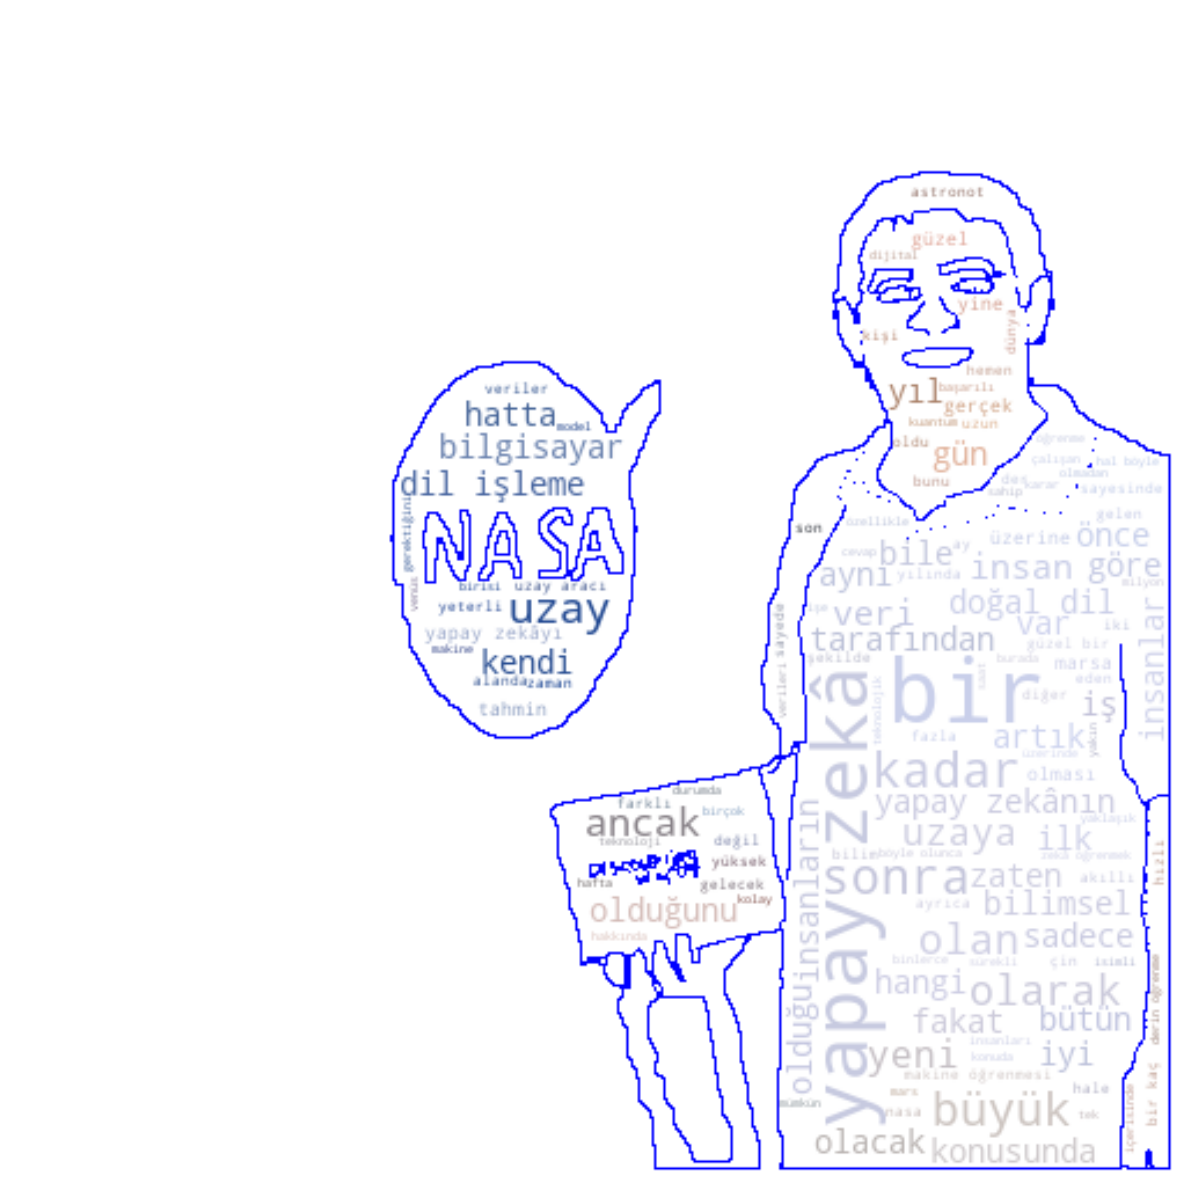

In [71]:
##ttles = np.array(Image.open("bottle size.png"))
bottles = np.array(Image.open("zacar3.png"))
wc = WordCloud(background_color="white", mask=bottles,
              contour_width=1, contour_color='blue')
wc.generate(all_text2)
image_colors = ImageColorGenerator(bottles)
wc.recolor(color_func=image_colors)
plt.figure(figsize=(15,20))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
#https://github.com/adashofdata/nlp-in-python-tutorial/blob/master/1-Data-Cleaning.ipynb

In [69]:
##Yaziyi grafik olarak gösteriyor yukardaki text i verdiğinde çalışmasını beklmek lazım.
##Markov Chain